In [1]:
!pip install ipython-autotime

In [2]:
%load_ext autotime

time: 369 µs (started: 2022-09-07 14:58:15 -05:00)


In [3]:
import torch
import numpy as np

#check if CUDA is available to use or not
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU...')
else:
    print('CUDA is available! Training on GPU...')


CUDA is not available. Training on CPU...
time: 5.21 s (started: 2022-09-07 14:58:15 -05:00)


In [4]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

time: 1.85 s (started: 2022-09-07 14:58:20 -05:00)


In [5]:
# number of subprocesses to use for data loading 
num_workers = 0
#how many samples per batch to load
train_batch_size = 64
test_batch_size = 1000

#number of epochs
n_epochs = 30
learning_rate = 0.01

#percentage of training set to use as validation
valid_size = 0.2

#convert data to a normalized torch.Floattensor

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])

# choose the training and test datasets
train_data = datasets.MNIST(root = 'data/', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data/', train = False, download = True, transform = transform)

## obtaining training indices and validation indices

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(num_train*valid_size))
train_index, valid_index = indices[split:], indices[:split]

#define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = train_batch_size, sampler = train_sampler, num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size = train_batch_size, sampler = valid_sampler, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = test_batch_size, num_workers = num_workers)

# specify the image classes
classes = ['0','1','2','3','4','5','6','7','8','9']


time: 79.3 ms (started: 2022-09-07 14:58:22 -05:00)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#helper function to un normalize and display an image
def imshow(img):
    img = img/2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img,(1,2,0)))  # convert from tensor to image

time: 1.52 s (started: 2022-09-07 14:58:22 -05:00)


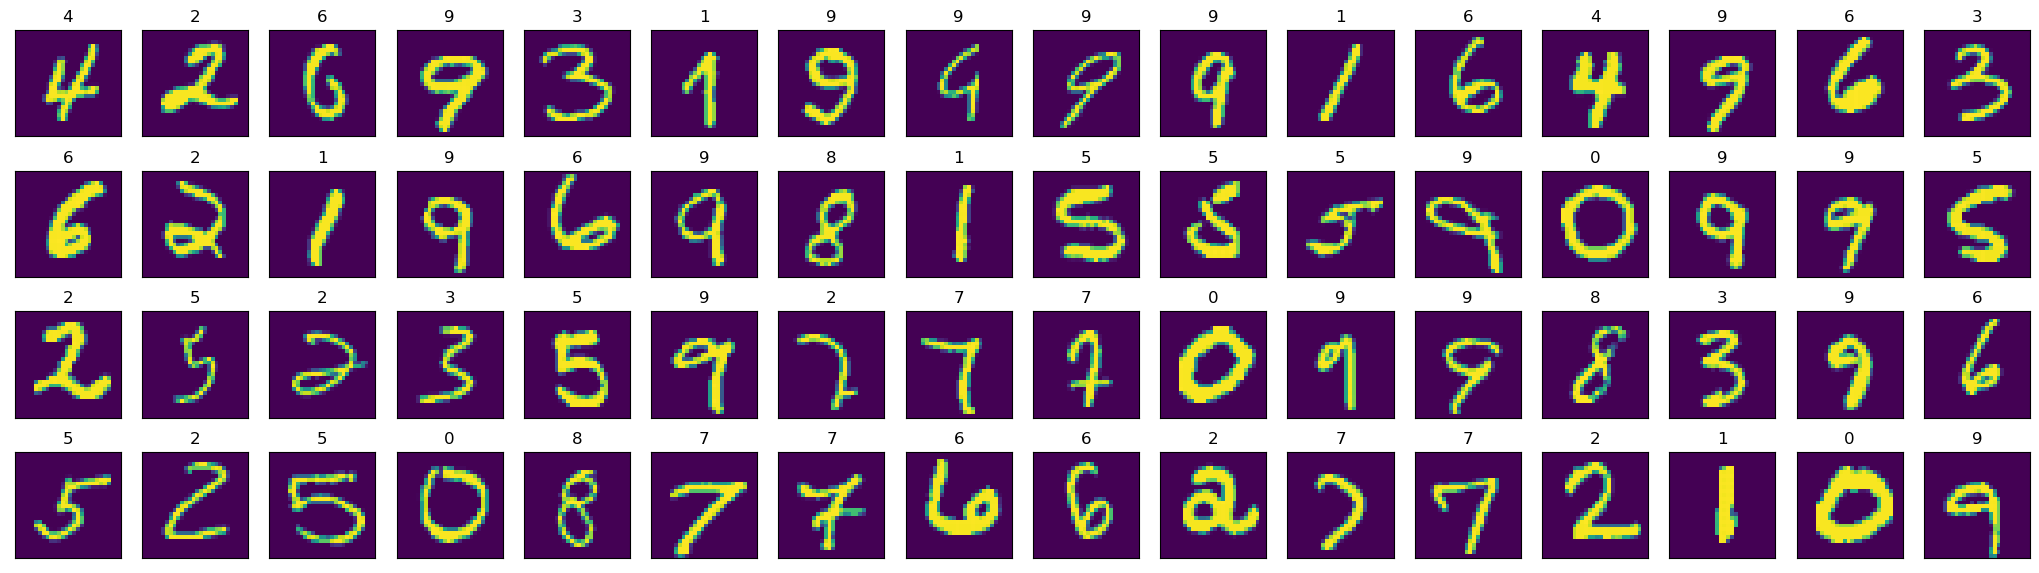

time: 1.19 s (started: 2022-09-07 14:58:23 -05:00)


In [7]:
# obtaining one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()  # convert into numpy to display the image
#the next command is to show the first image of the batch, so its better ignore it
#plt.imshow(images[0].reshape(28,28))  # reshape the numpy image into 28 by 28

# plot the images in the batch along with the labels
fig = plt.figure(figsize=(26,7))   # this will create patch of the given size to fit all the images in the batch
# display 64 images
for idx in np.arange(64):
    ax = fig.add_subplot(4,int(64/4),idx+1,xticks = [],yticks = [])
    plt.imshow(images[idx].reshape(28,28))
    ax.set_title(classes[labels[idx]])
    
    


In [8]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN architecture 
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net, self).__init__()
        self.conv_layer = nn.Sequential(
        
            # Conv Layer block 1
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1), 
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        
            
            # Conv Layer block 2
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout2d(p = 0.05),
            
            #Conv Layer block 3
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        
        
        
        self.fc_layer = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Linear(2304,1024),
            nn.ReLU(inplace = True),
            nn.Linear(1024,512),
            nn.ReLU(inplace = True),
            nn.Dropout(p = 0.1),
            nn.Linear(512,10)
        )
        
        
        # perform forward
        
    def forward(self,x):
            
        #perform conv layers
        x = self.conv_layer(x)
            
            # flatten. This will convert the tensor from the dimension of x to the dimension of x.size(0)
        x = x.view(x.size(0),-1)
            
        x = self.fc_layer(x)
            
        return x
        
# create a complete CNN
model = Net()
print(model)
        
        # move tensor to gpu if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv_layer): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [9]:
import torch.optim as optim

# Loss function
loss_function = nn.CrossEntropyLoss()
#optimizer specification
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

time: 510 µs (started: 2022-09-07 14:58:25 -05:00)


In [10]:
train_losslist = []
# number of epochs to train the model
n_epochs = [*range(30)]
valid_loss_min = np.Inf # track change in validation loss

for epoch in n_epochs:
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ############
    #train the model
    ##########
    model.train()
    for data, target in train_loader:
        # move tensors to gpu if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
            
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass : compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = loss_function(output, target)
        # backward pass: compute gradient of the loss with respect to the model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        #update training loss
        train_loss += loss.item()*data.size(0)
        
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = loss_function(output, target)
        # update average validation loss
        valid_loss += loss.item()*data.size(0)
        
        
    # calculate the average losses 
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    train_losslist.append(train_loss)
    
    
    # print training/ validation statistics
    print("Epoch: {} \tTraining Loss: {:.6f}\tValidation Loss: {:.6f}".format(epoch, train_loss, valid_loss))
    
    # Save model if the validation loss has decreased
    if valid_loss<=valid_loss_min:
        print('Validation loss decreased ({:.6f}-->{:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(),'model_MNIST.pt')
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 0.509101	Validation Loss: 0.026438
Validation loss decreased (inf-->0.026438). Saving model...
Epoch: 1 	Training Loss: 0.060819	Validation Loss: 0.011314
Validation loss decreased (0.026438-->0.011314). Saving model...
Epoch: 2 	Training Loss: 0.040440	Validation Loss: 0.007659
Validation loss decreased (0.011314-->0.007659). Saving model...
Epoch: 3 	Training Loss: 0.029584	Validation Loss: 0.007392
Validation loss decreased (0.007659-->0.007392). Saving model...
Epoch: 4 	Training Loss: 0.024133	Validation Loss: 0.005838
Validation loss decreased (0.007392-->0.005838). Saving model...
Epoch: 5 	Training Loss: 0.018379	Validation Loss: 0.005783
Validation loss decreased (0.005838-->0.005783). Saving model...
Epoch: 6 	Training Loss: 0.014941	Validation Loss: 0.005923
Epoch: 7 	Training Loss: 0.012243	Validation Loss: 0.006470
Epoch: 8 	Training Loss: 0.010372	Validation Loss: 0.005377
Validation loss decreased (0.005783-->0.005377). Saving model...
Epoch: 9 	

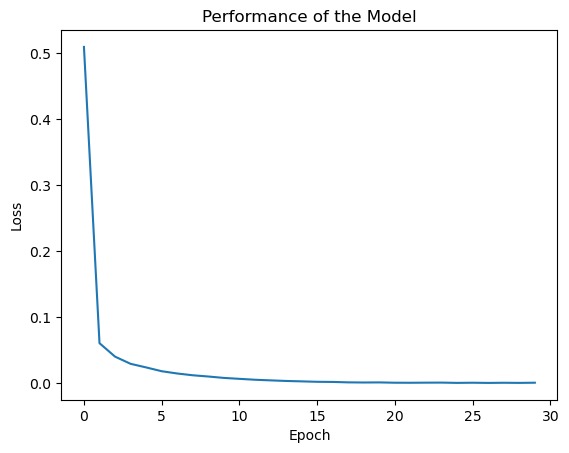

time: 71 ms (started: 2022-09-07 17:20:46 -05:00)


In [11]:
# The graph for epochs vs Loss
n_epochs = [*range(30)]
plt.plot(n_epochs, train_losslist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance of the Model')
plt.show()

In [12]:
# track the test loss
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU  if CUDA is available.
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    
    # forward pass: Compute predicted outputs by passing inputs to the model
    output = model(data)
    #calculate the batch loss
    loss= loss_function(output, target)
    # update the test loss
    test_loss += loss.item()*data.size(0) # data.size(0) is the size of the batch which is 1000 and loss.item()
    # converts the tensors into a number for regular algebraic operation. so this gives
    # the total loss of the entire dataset
    _,pred = torch.max(output,1) # this gives the predictions of the class label 
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy() if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy()))
    #now calculate the test accuracy for each object class
    for i in range(train_batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        
        
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:6f}\n '.format(test_loss))

for i in range(10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (classes[i],100 * class_correct[i]/class_total[i],
                                                         np.sum(class_correct[i]),np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)'%(classes[i]))
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)'%(100. * np.sum(class_correct)/np.sum(class_total),
                                                                np.sum(class_correct),np.sum(class_total)))
    

Test Loss: 0.019385
 
Test Accuracy of     0: 98% (59/60)
Test Accuracy of     1: 100% (89/89)
Test Accuracy of     2: 100% (61/61)
Test Accuracy of     3: 100% (61/61)
Test Accuracy of     4: 98% (68/69)
Test Accuracy of     5: 97% (47/48)
Test Accuracy of     6: 98% (69/70)
Test Accuracy of     7: 95% (60/63)
Test Accuracy of     8: 100% (51/51)
Test Accuracy of     9: 100% (68/68)

Test Accuracy (Overall): 98% (633/640)
time: 14.6 s (started: 2022-09-07 17:20:46 -05:00)
